In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
flow = pd.read_pickle('./data/soroe_13_19.pkl')
flow_05 = pd.read_pickle('./data/flow_05.pkl')

In [3]:
flow = flow[flow.index.date > datetime.date(2013, 11, 28)]

In [4]:
flow.sum()

flow    3.560793e+06
dtype: float64

In [5]:
def deleaker(flow, alpha):
    
    flow = flow.copy()
    flow[flow.index.year == 2013] = flow[flow.index.year == 2013].apply(lambda x : x*(1-0.06)*alpha + (x-3.51)*(1-alpha))
    flow[flow.index.year == 2014] = flow[flow.index.year == 2014].apply(lambda x : x*(1-0.06)*alpha + (x-3.51)*(1-alpha))
    flow[flow.index.year == 2015] = flow[flow.index.year == 2015].apply(lambda x : x*(1-0.21)*alpha + (x-14.42)*(1-alpha))
    flow[flow.index.year == 2016] = flow[flow.index.year == 2016].apply(lambda x : x*(1-0.14)*alpha + (x-9.35)*(1-alpha))
    flow[flow.index.year == 2017] = flow[flow.index.year == 2017].apply(lambda x : x*(1-0.11)*alpha + (x-6.30)*(1-alpha))
    flow[flow.index.year == 2018] = flow[flow.index.year == 2018].apply(lambda x : x*(1-0.14)*alpha + (x-9.29)*(1-alpha))
    flow[(flow.index.year == 2019) & (flow.index.month < 4)] = flow[(flow.index.year == 2019) & (flow.index.month < 4)].apply(lambda x : x*(1-0.15)*alpha + (x-9.7)*(1-alpha))
    flow[(flow.index.year == 2019) & (flow.index.month > 3)] = flow[(flow.index.year == 2019) & (flow.index.month > 3)].apply(lambda x : x*(1-0.173)*alpha + (x-11.8)*(1-alpha))

    return flow
    

In [6]:
flow_01 = deleaker(flow, alpha=0.1)
flow_02 = deleaker(flow, alpha=0.2)
flow_03 = deleaker(flow, alpha=0.3)
flow_04 = deleaker(flow, alpha=0.4)
flow_05 = deleaker(flow, alpha=0.5)
flow_06 = deleaker(flow, alpha=0.6)
flow_07 = deleaker(flow, alpha=0.7)
flow_08 = deleaker(flow, alpha=0.8)
flow_09 = deleaker(flow, alpha=0.9)

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


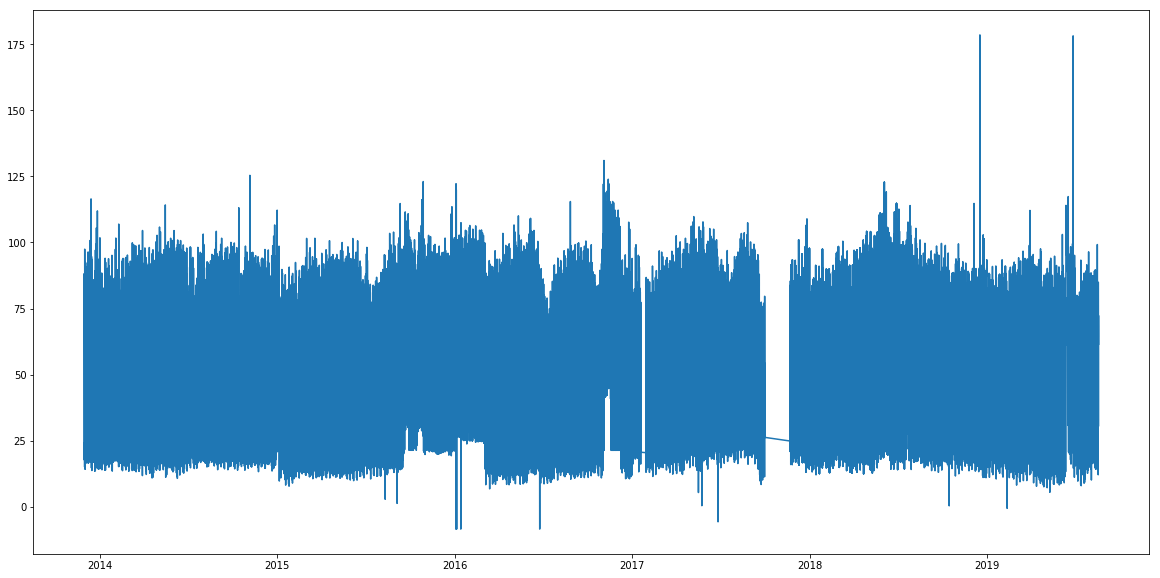

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(flow_01)

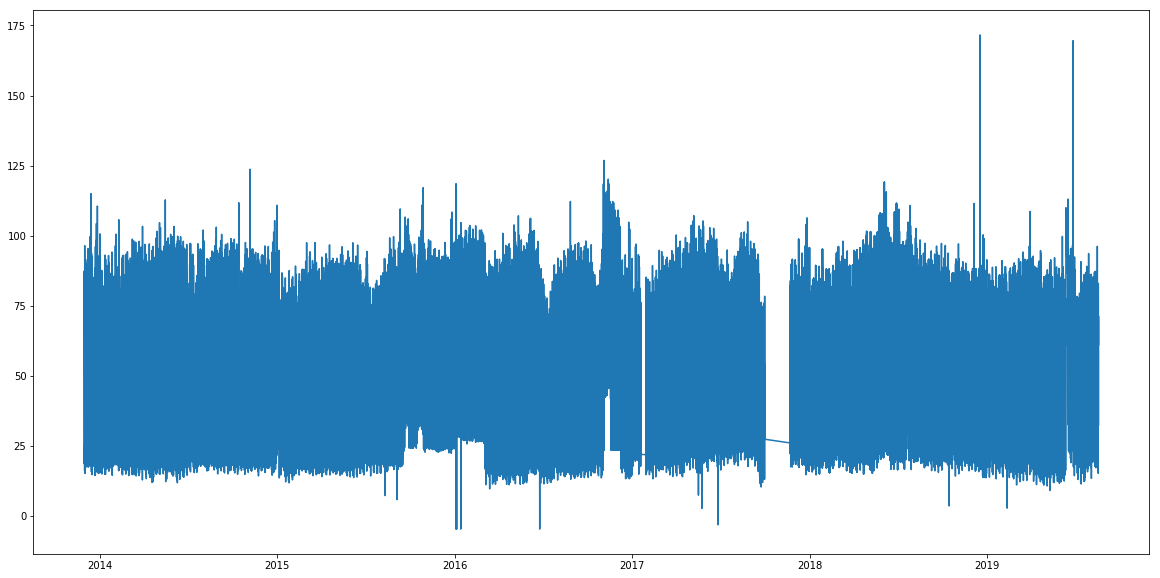

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(flow_05)

In [9]:
flow_05 = flow_05[(flow_05 > 5) & (flow_05 < 150)]

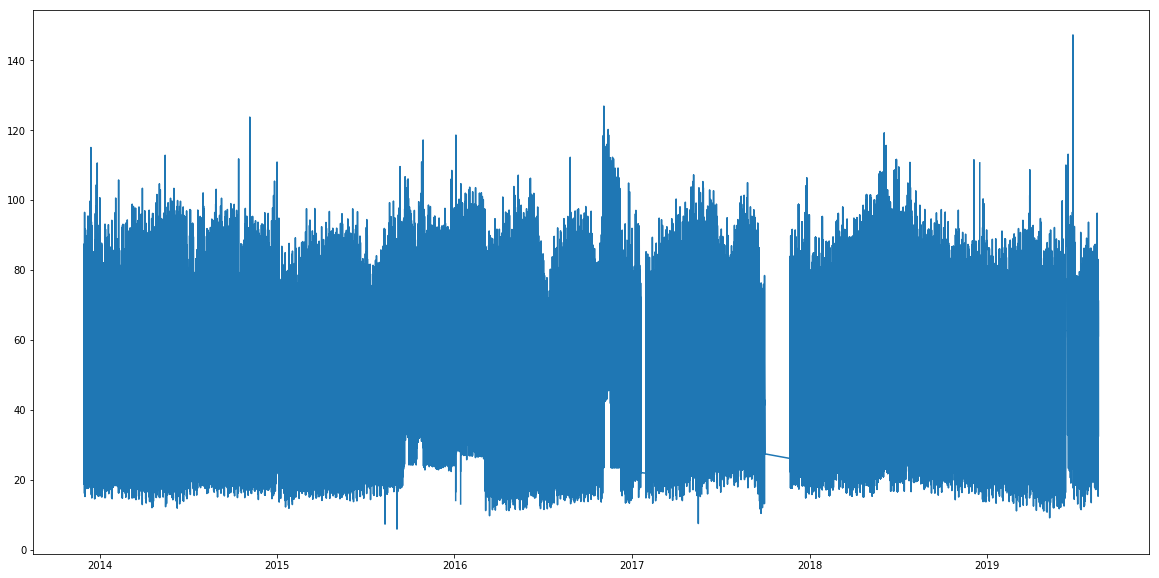

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(flow_05)

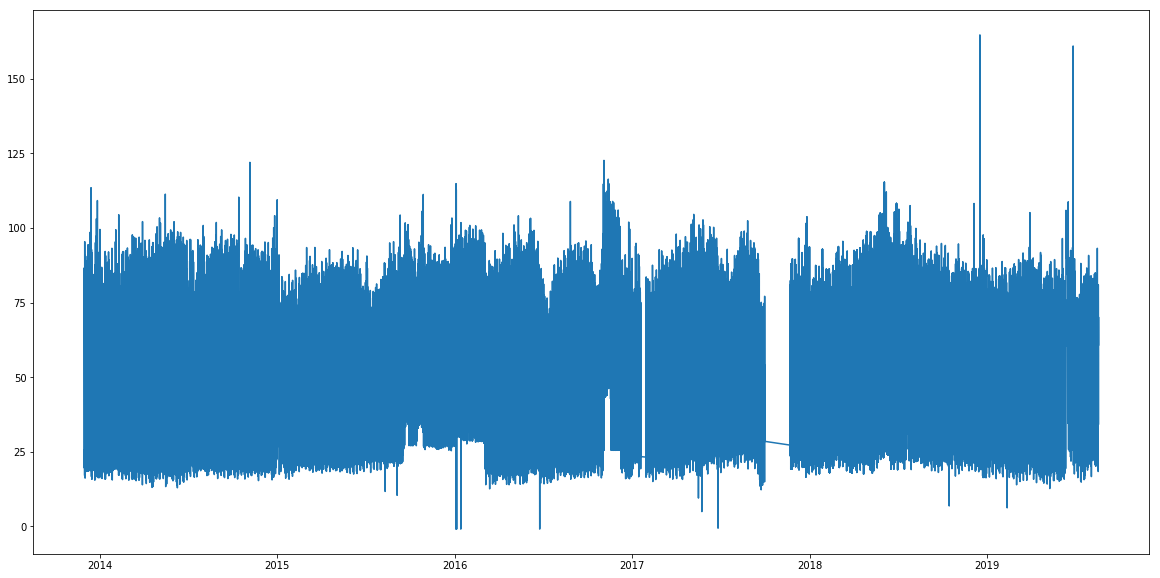

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(flow_09)

In [12]:
flow_05.to_pickle('./data/flow_05.pkl')